In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
train = pd.read_csv('train_jqd04QH.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [106]:
test = pd.read_csv('test_KaymcHn.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [107]:
train.shape

(18359, 14)

In [108]:
test.shape

(15021, 13)

In [109]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [110]:
train['gender'] = train['gender'].fillna(train['gender'].value_counts().index[0])
train['enrolled_university'] = train['enrolled_university'].fillna(train['enrolled_university'].value_counts().index[0])
train['education_level'] = train['education_level'].fillna(train['education_level'].value_counts().index[0])
train['major_discipline'] = train['major_discipline'].fillna(train['major_discipline'].value_counts().index[0])
train['company_type'] = train['company_type'].fillna(train['company_type'].value_counts().index[0])

In [111]:
categorical_variables = train[['gender', 'education_level', 'relevent_experience', 'major_discipline', 'company_type',
                               'enrolled_university', 'company_size', 'last_new_job']]

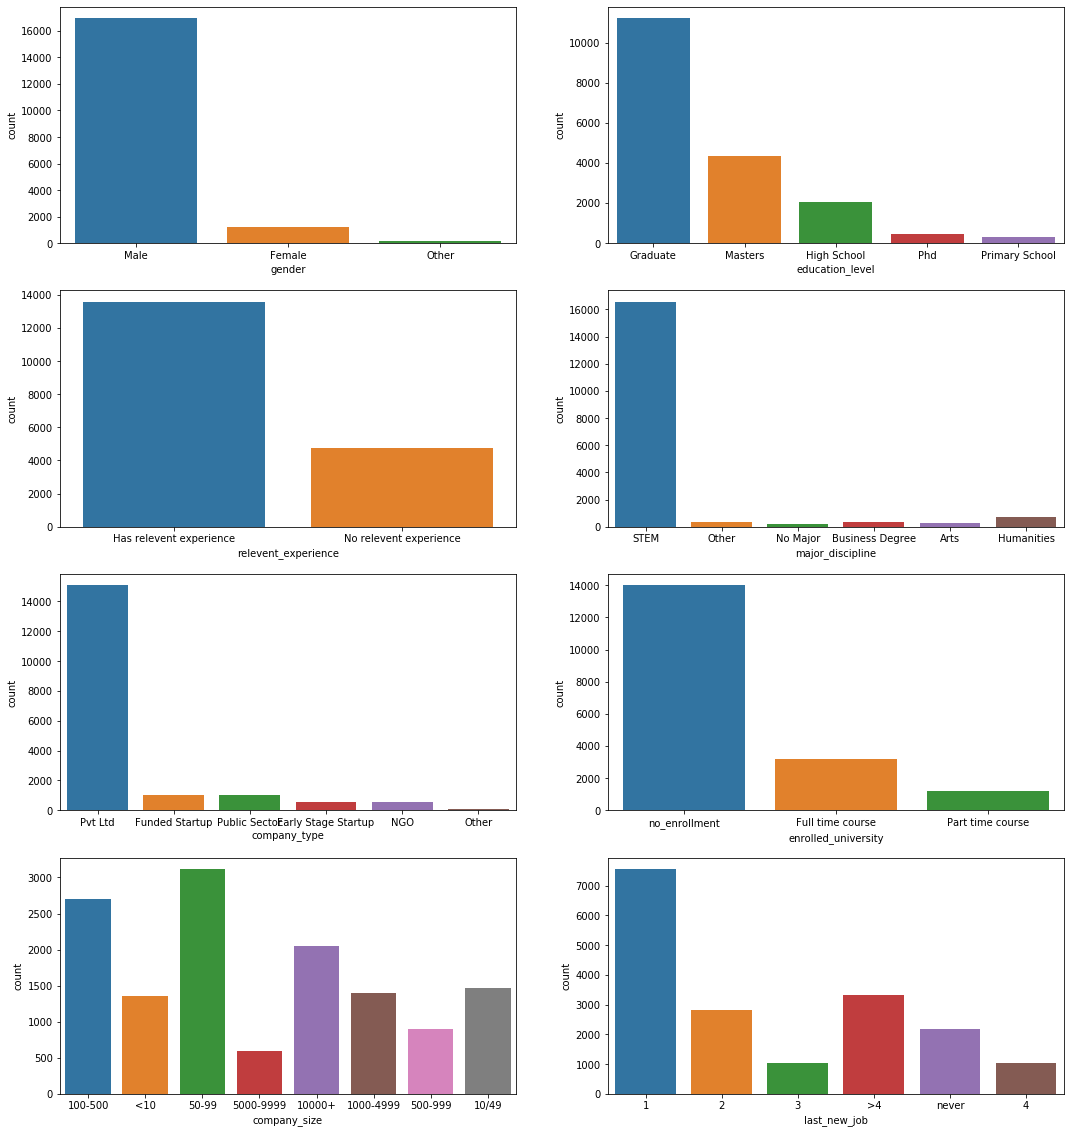

In [112]:
fig, ax = plt.subplots(4, 2, figsize = (18,20))
for i, subplot in zip(categorical_variables, ax.flatten()):
    sns.countplot(train[i], ax = subplot)

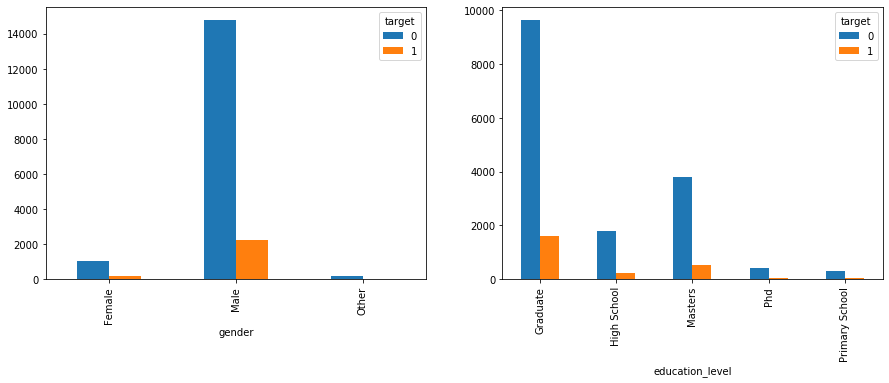

In [113]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['gender'], train['target']).plot.bar(ax=ax[0])
pd.crosstab(train['education_level'], train['target']).plot.bar(ax=ax[1])

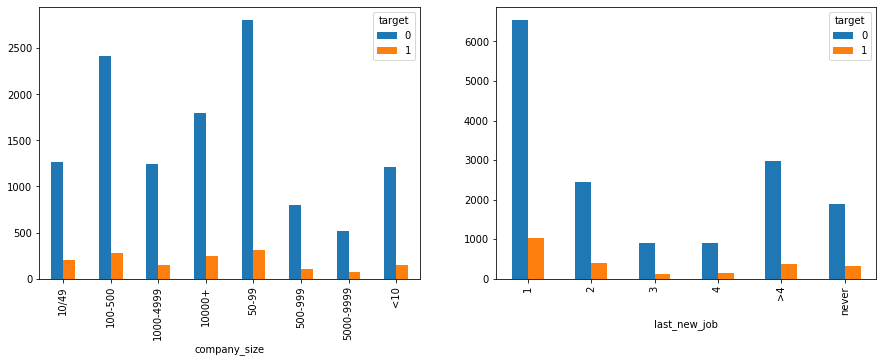

In [114]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['company_size'], train['target']).plot.bar(ax=ax[0])
pd.crosstab(train['last_new_job'], train['target']).plot.bar(ax=ax[1])

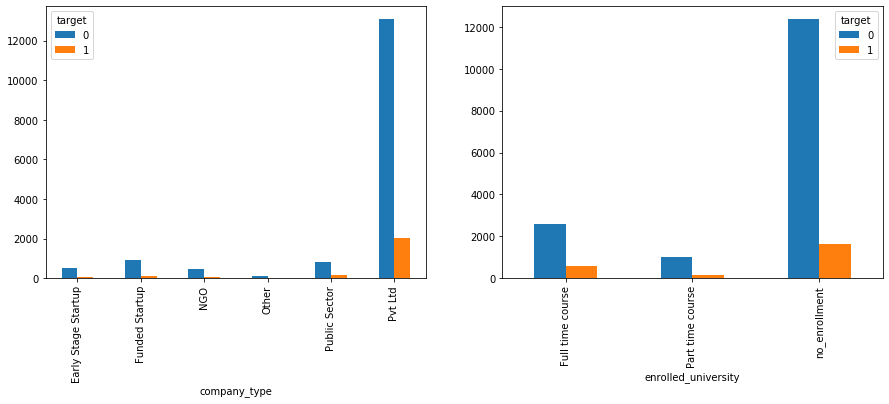

In [115]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['company_type'], train['target']).plot.bar(ax=ax[0])
pd.crosstab(train['enrolled_university'], train['target']).plot.bar(ax=ax[1])

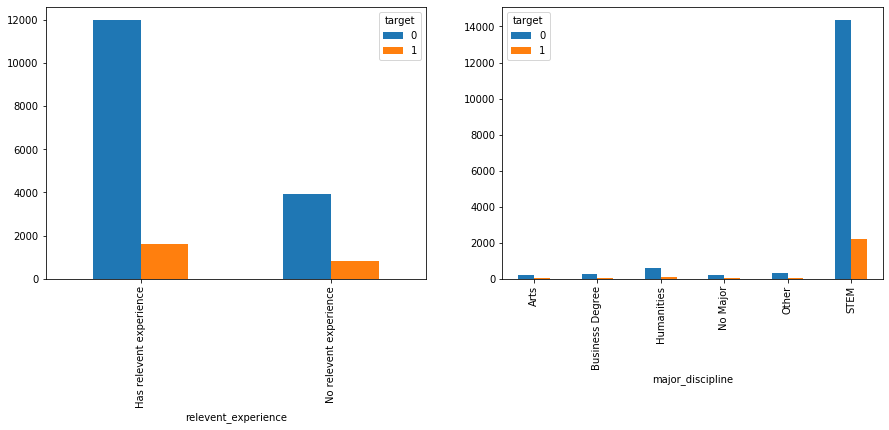

In [116]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['relevent_experience'], train['target']).plot.bar(ax=ax[0])
pd.crosstab(train['major_discipline'], train['target']).plot.bar(ax=ax[1])

In [117]:
train['experience'] = train['experience'].replace({'>20': 21, '<1': 0})
train['experience'] = train['experience'].fillna(train['experience'].value_counts().index[0])
train['experience'] = train['experience'].astype(int)

In [118]:
train['company_size'] = train['company_size'].replace({'<10': 0, '10/49': 1,'50-99':2, '100-500':3, '500-999':4,
                                                      '1000-4999': 5, '5000-9999': 6, '10000+': 7})
train['company_size'] = train['company_size'].fillna(train['company_size'].value_counts().index[0])
train['company_size'] = train['company_size'].astype(int)

In [119]:
train['last_new_job'] = train['last_new_job'].replace({'never': 0, '>4' : 5})
train['last_new_job'] = train['last_new_job'].fillna(train['last_new_job'].value_counts().index[0])
train['last_new_job'] = train['last_new_job'].astype(int)

In [120]:
train['relevent_experience'] = train['relevent_experience'].replace({'Has relevent experience' : 1, 'No relevent experience':0})
train['relevent_experience'] = train['relevent_experience'].astype(int)

In [121]:
train['education_level'] = train['education_level'].replace({'Primary School' : 0, 'High School' : 1, 'Graduate' : 2,
                                                            'Masters': 3, 'Phd' : 4})
train['education_level'] = train['education_level'].astype(int)

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['gender'] = le.fit_transform(train['gender'])
train['enrolled_university'] = le.fit_transform(train['enrolled_university'])
train['major_discipline'] = le.fit_transform(train['major_discipline'])
train['company_type'] = le.fit_transform(train['company_type'])
train['city'] = le.fit_transform(train['city'])

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null int32
city_development_index    18359 non-null float64
gender                    18359 non-null int32
relevent_experience       18359 non-null int32
enrolled_university       18359 non-null int32
education_level           18359 non-null int32
major_discipline          18359 non-null int32
experience                18359 non-null int32
company_size              18359 non-null int32
company_type              18359 non-null int32
last_new_job              18359 non-null int32
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int32(10), int64(3)
memory usage: 1.3 MB


In [124]:
test['gender'] = test['gender'].fillna(test['gender'].value_counts().index[0])
test['enrolled_university'] = test['enrolled_university'].fillna(test['enrolled_university'].value_counts().index[0])
test['education_level'] = test['education_level'].fillna(test['education_level'].value_counts().index[0])
test['major_discipline'] = test['major_discipline'].fillna(test['major_discipline'].value_counts().index[0])
test['company_type'] = test['company_type'].fillna(test['company_type'].value_counts().index[0])

In [125]:
test['experience'] = test['experience'].replace({'>20': 21, '<1': 0})
test['experience'] = test['experience'].fillna(test['experience'].value_counts().index[0])
test['experience'] = test['experience'].astype(int)

In [126]:
test['company_size'] = test['company_size'].replace({'<10': 0, '10/49': 1,'50-99':2, '100-500':3, '500-999':4,
                                                      '1000-4999': 5, '5000-9999': 6, '10000+': 7})
test['company_size'] = test['company_size'].fillna(test['company_size'].value_counts().index[0])
test['company_size'] = test['company_size'].astype(int)

In [127]:
test['last_new_job'] = test['last_new_job'].replace({'never': 0, '>4' : 5})
test['last_new_job'] = test['last_new_job'].fillna(test['last_new_job'].value_counts().index[0])
test['last_new_job'] = test['last_new_job'].astype(int)

In [128]:
test['relevent_experience'] = test['relevent_experience'].replace({'Has relevent experience' : 1, 'No relevent experience':0})
test['relevent_experience'] = test['relevent_experience'].astype(int)

test['education_level'] = test['education_level'].replace({'Primary School' : 0, 'High School' : 1, 'Graduate' : 2,
                                                            'Masters': 3, 'Phd' : 4})
test['education_level'] = test['education_level'].astype(int)

In [129]:
test['gender'] = le.fit_transform(test['gender'])
test['enrolled_university'] = le.fit_transform(test['enrolled_university'])
test['major_discipline'] = le.fit_transform(test['major_discipline'])
test['company_type'] = le.fit_transform(test['company_type'])
test['city'] = le.fit_transform(test['city'])

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
enrollee_id               15021 non-null int64
city                      15021 non-null int32
city_development_index    15021 non-null float64
gender                    15021 non-null int32
relevent_experience       15021 non-null int32
enrolled_university       15021 non-null int32
education_level           15021 non-null int32
major_discipline          15021 non-null int32
experience                15021 non-null int32
company_size              15021 non-null int32
company_type              15021 non-null int32
last_new_job              15021 non-null int32
training_hours            15021 non-null int64
dtypes: float64(1), int32(10), int64(2)
memory usage: 938.9 KB


In [131]:
x_test = test

In [132]:
x = train.iloc[:,:-1]
y = train.iloc[:, -1]

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

In [135]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()
bagg.fit(x_train, y_train)
bagg_pred = bagg.predict(x_test)

print('Training score is', bagg.score(x_train, y_train))
solution = pd.DataFrame({'enrollee_id': test.enrollee_id, 'target': bagg_pred})
solution.to_csv('Bagg3.csv',index = False)

Training score is 0.9792234067387752
